In [211]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [212]:
df_train= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [213]:
df_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [214]:
df_train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [215]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [216]:
print(df_train.isnull().any().count())

563


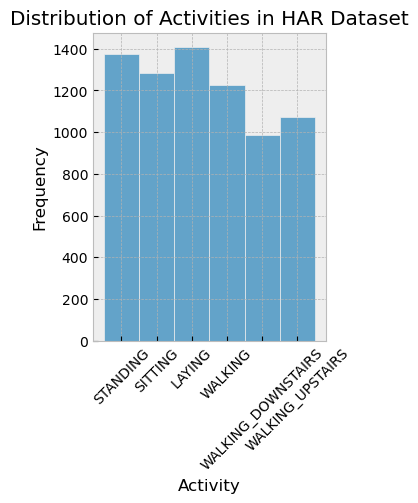

In [217]:
# Extract the target labels
value= df_train['Activity']

# Plot the histogram
plt.figure(figsize=(3, 4))
sns.histplot(value, kde=False, bins=len(value.unique()))
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.title('Distribution of Activities in HAR Dataset')
plt.xticks(rotation=45)
plt.show()

In [218]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [219]:
y_train = df_train['Activity']

In [220]:
#encoding
from sklearn import preprocessing

# Creating LabelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
y_train = le.fit_transform(y_train)

print(y_train)

[2 2 2 ... 5 5 5]


In [221]:
y_train.shape

(7352,)

In [222]:
df_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [223]:
df_train.columns.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [224]:
XCol = ['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','tBodyAcc-std()-X','tBodyAcc-std()-Y','tBodyAcc-std()-Z','tBodyAcc-mad()-X','tBodyAcc-mad()-Y','tBodyAcc-mad()-Z','tBodyAcc-max()-X','tBodyAcc-max()-Y','tBodyAcc-max()-Z','tBodyAcc-min()-X','tBodyAcc-min()-Y','tBodyAcc-min()-Z','tBodyAcc-sma()','tBodyAcc-energy()-X','tBodyAcc-energy()-Y','tBodyAcc-energy()-Z','tBodyAcc-iqr()-X','tBodyAcc-iqr()-Y','tBodyAcc-iqr()-Z','tBodyAcc-entropy()-X','tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z','tBodyAcc-arCoeff()-X,1','tBodyAcc-arCoeff()-X,2','tBodyAcc-arCoeff()-X,3','tBodyAcc-arCoeff()-X,4','tBodyAcc-arCoeff()-Y,1','tBodyAcc-arCoeff()-Y,2','tBodyAcc-arCoeff()-Y,3','tBodyAcc-arCoeff()-Y,4','tBodyAcc-arCoeff()-Z,1','tBodyAcc-arCoeff()-Z,2','tBodyAcc-arCoeff()-Z,3','tBodyAcc-arCoeff()-Z,4','tBodyAcc-correlation()-X,Y','tBodyAcc-correlation()-X,Z','tBodyAcc-correlation()-Y,Z','tGravityAcc-mean()-X','tGravityAcc-mean()-Y','tGravityAcc-mean()-Z','tGravityAcc-std()-X','tGravityAcc-std()-Y',
 'tGravityAcc-std()-Z',
 'tGravityAcc-mad()-X',
 'tGravityAcc-mad()-Y',
 'tGravityAcc-mad()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-iqr()-X',
 'tGravityAcc-iqr()-Y',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-entropy()-X',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-arCoeff()-X,2',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Y,2',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Y,4',
 'tGravityAcc-arCoeff()-Z,1',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-arCoeff()-Z,4',
 'tGravityAcc-correlation()-X,Y',
 'tGravityAcc-correlation()-X,Z',
 'tGravityAcc-correlation()-Y,Z',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-mean()-Y',
 'tBodyAccJerk-mean()-Z',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerk-std()-Z',
 'tBodyAccJerk-mad()-X',
 'tBodyAccJerk-mad()-Y',
 'tBodyAccJerk-mad()-Z',
 'tBodyAccJerk-max()-X',
 'tBodyAccJerk-max()-Y',
 'tBodyAccJerk-max()-Z',
 'tBodyAccJerk-min()-X',
 'tBodyAccJerk-min()-Y',
 'tBodyAccJerk-min()-Z',
 'tBodyAccJerk-sma()',
 'tBodyAccJerk-energy()-X',
 'tBodyAccJerk-energy()-Y',
 'tBodyAccJerk-energy()-Z',
 'tBodyAccJerk-iqr()-X',
 'tBodyAccJerk-iqr()-Y',
 'tBodyAccJerk-iqr()-Z',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-X,1',
 'tBodyAccJerk-arCoeff()-X,2',
 'tBodyAccJerk-arCoeff()-X,3',
 'tBodyAccJerk-arCoeff()-X,4',
 'tBodyAccJerk-arCoeff()-Y,1',
 'tBodyAccJerk-arCoeff()-Y,2',
 'tBodyAccJerk-arCoeff()-Y,3',
 'tBodyAccJerk-arCoeff()-Y,4',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyAccJerk-arCoeff()-Z,2',
 'tBodyAccJerk-arCoeff()-Z,3',
 'tBodyAccJerk-arCoeff()-Z,4',
 'tBodyAccJerk-correlation()-X,Y',
 'tBodyAccJerk-correlation()-X,Z',
 'tBodyAccJerk-correlation()-Y,Z',
 'tBodyGyro-mean()-X',
 'tBodyGyro-mean()-Y',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyro-std()-Z',
 'tBodyGyro-mad()-X',
 'tBodyGyro-mad()-Y',
 'tBodyGyro-mad()-Z',
 'tBodyGyro-max()-X',
 'tBodyGyro-max()-Y',
 'tBodyGyro-max()-Z',
 'tBodyGyro-min()-X',
 'tBodyGyro-min()-Y',
 'tBodyGyro-min()-Z',
 'tBodyGyro-sma()',
 'tBodyGyro-energy()-X',
 'tBodyGyro-energy()-Y',
 'tBodyGyro-energy()-Z',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-iqr()-Y',
 'tBodyGyro-iqr()-Z',
 'tBodyGyro-entropy()-X',
 'tBodyGyro-entropy()-Y',
 'tBodyGyro-entropy()-Z',
 'tBodyGyro-arCoeff()-X,1',
 'tBodyGyro-arCoeff()-X,2',
 'tBodyGyro-arCoeff()-X,3',
 'tBodyGyro-arCoeff()-X,4',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyro-arCoeff()-Y,2',
 'tBodyGyro-arCoeff()-Y,3',
 'tBodyGyro-arCoeff()-Y,4',
 'tBodyGyro-arCoeff()-Z,1',
 'tBodyGyro-arCoeff()-Z,2',
 'tBodyGyro-arCoeff()-Z,3',
 'tBodyGyro-arCoeff()-Z,4',
 'tBodyGyro-correlation()-X,Y',
 'tBodyGyro-correlation()-X,Z',
 'tBodyGyro-correlation()-Y,Z',
 'tBodyGyroJerk-mean()-X',
 'tBodyGyroJerk-mean()-Y',
 'tBodyGyroJerk-mean()-Z',
 'tBodyGyroJerk-std()-X',
 'tBodyGyroJerk-std()-Y',
 'tBodyGyroJerk-std()-Z',
 'tBodyGyroJerk-mad()-X',
 'tBodyGyroJerk-mad()-Y',
 'tBodyGyroJerk-mad()-Z',
 'tBodyGyroJerk-max()-X',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-max()-Z',
 'tBodyGyroJerk-min()-X',
 'tBodyGyroJerk-min()-Y',
 'tBodyGyroJerk-min()-Z',
 'tBodyGyroJerk-sma()',
 'tBodyGyroJerk-energy()-X',
 'tBodyGyroJerk-energy()-Y',
 'tBodyGyroJerk-energy()-Z',
 'tBodyGyroJerk-iqr()-X',
 'tBodyGyroJerk-iqr()-Y',
 'tBodyGyroJerk-iqr()-Z',
 'tBodyGyroJerk-entropy()-X',
 'tBodyGyroJerk-entropy()-Y',
 'tBodyGyroJerk-entropy()-Z',
 'tBodyGyroJerk-arCoeff()-X,1',
 'tBodyGyroJerk-arCoeff()-X,2',
 'tBodyGyroJerk-arCoeff()-X,3',
 'tBodyGyroJerk-arCoeff()-X,4',
 'tBodyGyroJerk-arCoeff()-Y,1',
 'tBodyGyroJerk-arCoeff()-Y,2',
 'tBodyGyroJerk-arCoeff()-Y,3',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tBodyGyroJerk-arCoeff()-Z,1',
 'tBodyGyroJerk-arCoeff()-Z,2',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tBodyGyroJerk-arCoeff()-Z,4',
 'tBodyGyroJerk-correlation()-X,Y',
 'tBodyGyroJerk-correlation()-X,Z',
 'tBodyGyroJerk-correlation()-Y,Z',
 'tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-min()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-energy()',
 'tBodyAccMag-iqr()',
 'tBodyAccMag-entropy()',
 'tBodyAccMag-arCoeff()1',
 'tBodyAccMag-arCoeff()2',
 'tBodyAccMag-arCoeff()3',
 'tBodyAccMag-arCoeff()4',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-std()',
 'tBodyAccJerkMag-mad()',
 'tBodyAccJerkMag-max()',
 'tBodyAccJerkMag-min()',
 'tBodyAccJerkMag-sma()',
 'tBodyAccJerkMag-energy()',
 'tBodyAccJerkMag-iqr()',
 'tBodyAccJerkMag-entropy()',
 'tBodyAccJerkMag-arCoeff()1',
 'tBodyAccJerkMag-arCoeff()2',
 'tBodyAccJerkMag-arCoeff()3',
 'tBodyAccJerkMag-arCoeff()4',
 'tBodyGyroMag-mean()',
 'tBodyGyroMag-std()',
 'tBodyGyroMag-mad()',
 'tBodyGyroMag-max()',
 'tBodyGyroMag-min()',
 'tBodyGyroMag-sma()',
 'tBodyGyroMag-energy()',
 'tBodyGyroMag-iqr()',
 'tBodyGyroMag-entropy()',
 'tBodyGyroMag-arCoeff()1',
 'tBodyGyroMag-arCoeff()2',
 'tBodyGyroMag-arCoeff()3',
 'tBodyGyroMag-arCoeff()4',
 'tBodyGyroJerkMag-mean()',
 'tBodyGyroJerkMag-std()',
 'tBodyGyroJerkMag-mad()',
 'tBodyGyroJerkMag-max()',
 'tBodyGyroJerkMag-min()',
 'tBodyGyroJerkMag-sma()',
 'tBodyGyroJerkMag-energy()',
 'tBodyGyroJerkMag-iqr()',
 'tBodyGyroJerkMag-entropy()',
 'tBodyGyroJerkMag-arCoeff()1',
 'tBodyGyroJerkMag-arCoeff()2',
 'tBodyGyroJerkMag-arCoeff()3',
 'tBodyGyroJerkMag-arCoeff()4',
 'fBodyAcc-mean()-X',
 'fBodyAcc-mean()-Y',
 'fBodyAcc-mean()-Z',
 'fBodyAcc-std()-X',
 'fBodyAcc-std()-Y',
 'fBodyAcc-std()-Z',
 'fBodyAcc-mad()-X',
 'fBodyAcc-mad()-Y',
 'fBodyAcc-mad()-Z',
 'fBodyAcc-max()-X',
 'fBodyAcc-max()-Y',
 'fBodyAcc-max()-Z',
 'fBodyAcc-min()-X',
 'fBodyAcc-min()-Y',
 'fBodyAcc-min()-Z',
 'fBodyAcc-sma()',
 'fBodyAcc-energy()-X',
 'fBodyAcc-energy()-Y',
 'fBodyAcc-energy()-Z',
 'fBodyAcc-iqr()-X',
 'fBodyAcc-iqr()-Y',
 'fBodyAcc-iqr()-Z',
 'fBodyAcc-entropy()-X',
 'fBodyAcc-entropy()-Y',
 'fBodyAcc-entropy()-Z',
 'fBodyAcc-maxInds-X',
 'fBodyAcc-maxInds-Y',
 'fBodyAcc-maxInds-Z',
 'fBodyAcc-meanFreq()-X',
 'fBodyAcc-meanFreq()-Y',
 'fBodyAcc-meanFreq()-Z',
 'fBodyAcc-skewness()-X',
 'fBodyAcc-kurtosis()-X',
 'fBodyAcc-skewness()-Y',
 'fBodyAcc-kurtosis()-Y',
 'fBodyAcc-skewness()-Z',
 'fBodyAcc-kurtosis()-Z',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-1,8.1',
 'fBodyAcc-bandsEnergy()-9,16.1',
 'fBodyAcc-bandsEnergy()-17,24.1',
 'fBodyAcc-bandsEnergy()-25,32.1',
 'fBodyAcc-bandsEnergy()-33,40.1',
 'fBodyAcc-bandsEnergy()-41,48.1',
 'fBodyAcc-bandsEnergy()-49,56.1',
 'fBodyAcc-bandsEnergy()-57,64.1',
 'fBodyAcc-bandsEnergy()-1,16.1',
 'fBodyAcc-bandsEnergy()-17,32.1',
 'fBodyAcc-bandsEnergy()-33,48.1',
 'fBodyAcc-bandsEnergy()-49,64.1',
 'fBodyAcc-bandsEnergy()-1,24.1',
 'fBodyAcc-bandsEnergy()-25,48.1',
 'fBodyAcc-bandsEnergy()-1,8.2',
 'fBodyAcc-bandsEnergy()-9,16.2',
 'fBodyAcc-bandsEnergy()-17,24.2',
 'fBodyAcc-bandsEnergy()-25,32.2',
 'fBodyAcc-bandsEnergy()-33,40.2',
 'fBodyAcc-bandsEnergy()-41,48.2',
 'fBodyAcc-bandsEnergy()-49,56.2',
 'fBodyAcc-bandsEnergy()-57,64.2',
 'fBodyAcc-bandsEnergy()-1,16.2',
 'fBodyAcc-bandsEnergy()-17,32.2',
 'fBodyAcc-bandsEnergy()-33,48.2',
 'fBodyAcc-bandsEnergy()-49,64.2',
 'fBodyAcc-bandsEnergy()-1,24.2',
 'fBodyAcc-bandsEnergy()-25,48.2',
 'fBodyAccJerk-mean()-X',
 'fBodyAccJerk-mean()-Y',
 'fBodyAccJerk-mean()-Z',
 'fBodyAccJerk-std()-X',
 'fBodyAccJerk-std()-Y',
 'fBodyAccJerk-std()-Z',
 'fBodyAccJerk-mad()-X',
 'fBodyAccJerk-mad()-Y',
 'fBodyAccJerk-mad()-Z',
 'fBodyAccJerk-max()-X',
 'fBodyAccJerk-max()-Y',
 'fBodyAccJerk-max()-Z',
 'fBodyAccJerk-min()-X',
 'fBodyAccJerk-min()-Y',
 'fBodyAccJerk-min()-Z',
 'fBodyAccJerk-sma()',
 'fBodyAccJerk-energy()-X',
 'fBodyAccJerk-energy()-Y',
 'fBodyAccJerk-energy()-Z',
 'fBodyAccJerk-iqr()-X',
 'fBodyAccJerk-iqr()-Y',
 'fBodyAccJerk-iqr()-Z',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Y',
 'fBodyAccJerk-entropy()-Z',
 'fBodyAccJerk-maxInds-X',
 'fBodyAccJerk-maxInds-Y',
 'fBodyAccJerk-maxInds-Z',
 'fBodyAccJerk-meanFreq()-X',
 'fBodyAccJerk-meanFreq()-Y',
 'fBodyAccJerk-meanFreq()-Z',
 'fBodyAccJerk-skewness()-X',
 'fBodyAccJerk-kurtosis()-X',
 'fBodyAccJerk-skewness()-Y',
 'fBodyAccJerk-kurtosis()-Y',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-kurtosis()-Z',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-1,8.1',
 'fBodyAccJerk-bandsEnergy()-9,16.1',
 'fBodyAccJerk-bandsEnergy()-17,24.1',
 'fBodyAccJerk-bandsEnergy()-25,32.1',
 'fBodyAccJerk-bandsEnergy()-33,40.1',
 'fBodyAccJerk-bandsEnergy()-41,48.1',
 'fBodyAccJerk-bandsEnergy()-49,56.1',
 'fBodyAccJerk-bandsEnergy()-57,64.1',
 'fBodyAccJerk-bandsEnergy()-1,16.1',
 'fBodyAccJerk-bandsEnergy()-17,32.1',
 'fBodyAccJerk-bandsEnergy()-33,48.1',
 'fBodyAccJerk-bandsEnergy()-49,64.1',
 'fBodyAccJerk-bandsEnergy()-1,24.1',
 'fBodyAccJerk-bandsEnergy()-25,48.1',
 'fBodyAccJerk-bandsEnergy()-1,8.2',
 'fBodyAccJerk-bandsEnergy()-9,16.2',
 'fBodyAccJerk-bandsEnergy()-17,24.2',
 'fBodyAccJerk-bandsEnergy()-25,32.2',
 'fBodyAccJerk-bandsEnergy()-33,40.2',
 'fBodyAccJerk-bandsEnergy()-41,48.2',
 'fBodyAccJerk-bandsEnergy()-49,56.2',
 'fBodyAccJerk-bandsEnergy()-57,64.2',
 'fBodyAccJerk-bandsEnergy()-1,16.2',
 'fBodyAccJerk-bandsEnergy()-17,32.2',
 'fBodyAccJerk-bandsEnergy()-33,48.2',
 'fBodyAccJerk-bandsEnergy()-49,64.2',
 'fBodyAccJerk-bandsEnergy()-1,24.2',
 'fBodyAccJerk-bandsEnergy()-25,48.2',
 'fBodyGyro-mean()-X',
 'fBodyGyro-mean()-Y',
 'fBodyGyro-mean()-Z',
 'fBodyGyro-std()-X',
 'fBodyGyro-std()-Y',
 'fBodyGyro-std()-Z',
 'fBodyGyro-mad()-X',
 'fBodyGyro-mad()-Y',
 'fBodyGyro-mad()-Z',
 'fBodyGyro-max()-X',
 'fBodyGyro-max()-Y',
 'fBodyGyro-max()-Z',
 'fBodyGyro-min()-X',
 'fBodyGyro-min()-Y',
 'fBodyGyro-min()-Z',
 'fBodyGyro-sma()',
 'fBodyGyro-energy()-X',
 'fBodyGyro-energy()-Y',
 'fBodyGyro-energy()-Z',
 'fBodyGyro-iqr()-X',
 'fBodyGyro-iqr()-Y',
 'fBodyGyro-iqr()-Z',
 'fBodyGyro-entropy()-X',
 'fBodyGyro-entropy()-Y',
 'fBodyGyro-entropy()-Z',
 'fBodyGyro-maxInds-X',
 'fBodyGyro-maxInds-Y',
 'fBodyGyro-maxInds-Z',
 'fBodyGyro-meanFreq()-X',
 'fBodyGyro-meanFreq()-Y',
 'fBodyGyro-meanFreq()-Z',
 'fBodyGyro-skewness()-X',
 'fBodyGyro-kurtosis()-X',
 'fBodyGyro-skewness()-Y',
 'fBodyGyro-kurtosis()-Y',
 'fBodyGyro-skewness()-Z',
 'fBodyGyro-kurtosis()-Z',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyGyro-bandsEnergy()-1,8.1',
 'fBodyGyro-bandsEnergy()-9,16.1',
 'fBodyGyro-bandsEnergy()-17,24.1',
 'fBodyGyro-bandsEnergy()-25,32.1',
 'fBodyGyro-bandsEnergy()-33,40.1',
 'fBodyGyro-bandsEnergy()-41,48.1',
 'fBodyGyro-bandsEnergy()-49,56.1',
 'fBodyGyro-bandsEnergy()-57,64.1',
 'fBodyGyro-bandsEnergy()-1,16.1',
 'fBodyGyro-bandsEnergy()-17,32.1',
 'fBodyGyro-bandsEnergy()-33,48.1',
 'fBodyGyro-bandsEnergy()-49,64.1',
 'fBodyGyro-bandsEnergy()-1,24.1',
 'fBodyGyro-bandsEnergy()-25,48.1',
 'fBodyGyro-bandsEnergy()-1,8.2',
 'fBodyGyro-bandsEnergy()-9,16.2',
 'fBodyGyro-bandsEnergy()-17,24.2',
 'fBodyGyro-bandsEnergy()-25,32.2',
 'fBodyGyro-bandsEnergy()-33,40.2',
 'fBodyGyro-bandsEnergy()-41,48.2',
 'fBodyGyro-bandsEnergy()-49,56.2',
 'fBodyGyro-bandsEnergy()-57,64.2',
 'fBodyGyro-bandsEnergy()-1,16.2',
 'fBodyGyro-bandsEnergy()-17,32.2',
 'fBodyGyro-bandsEnergy()-33,48.2',
 'fBodyGyro-bandsEnergy()-49,64.2',
 'fBodyGyro-bandsEnergy()-1,24.2',
 'fBodyGyro-bandsEnergy()-25,48.2',
 'fBodyAccMag-mean()',
 'fBodyAccMag-std()',
 'fBodyAccMag-mad()',
 'fBodyAccMag-max()',
 'fBodyAccMag-min()',
 'fBodyAccMag-sma()',
 'fBodyAccMag-energy()',
 'fBodyAccMag-iqr()',
 'fBodyAccMag-entropy()',
 'fBodyAccMag-maxInds',
 'fBodyAccMag-meanFreq()',
 'fBodyAccMag-skewness()',
 'fBodyAccMag-kurtosis()',
 'fBodyBodyAccJerkMag-mean()',
 'fBodyBodyAccJerkMag-std()',
 'fBodyBodyAccJerkMag-mad()',
 'fBodyBodyAccJerkMag-max()',
 'fBodyBodyAccJerkMag-min()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyAccJerkMag-energy()',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyAccJerkMag-maxInds',
 'fBodyBodyAccJerkMag-meanFreq()',
 'fBodyBodyAccJerkMag-skewness()',
 'fBodyBodyAccJerkMag-kurtosis()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroMag-std()',
 'fBodyBodyGyroMag-mad()',
 'fBodyBodyGyroMag-max()',
 'fBodyBodyGyroMag-min()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroMag-energy()',
 'fBodyBodyGyroMag-iqr()',
 'fBodyBodyGyroMag-entropy()',
 'fBodyBodyGyroMag-maxInds',
 'fBodyBodyGyroMag-meanFreq()',
 'fBodyBodyGyroMag-skewness()',
 'fBodyBodyGyroMag-kurtosis()',
 'fBodyBodyGyroJerkMag-mean()',
 'fBodyBodyGyroJerkMag-std()',
 'fBodyBodyGyroJerkMag-mad()',
 'fBodyBodyGyroJerkMag-max()',
 'fBodyBodyGyroJerkMag-min()',
 'fBodyBodyGyroJerkMag-sma()',
 'fBodyBodyGyroJerkMag-energy()',
 'fBodyBodyGyroJerkMag-iqr()',
 'fBodyBodyGyroJerkMag-entropy()',
 'fBodyBodyGyroJerkMag-maxInds',
 'fBodyBodyGyroJerkMag-meanFreq()',
 'fBodyBodyGyroJerkMag-skewness()',
 'fBodyBodyGyroJerkMag-kurtosis()',
 'angle(tBodyAccMean,gravity)',
 'angle(tBodyAccJerkMean),gravityMean)',
 'angle(tBodyGyroMean,gravityMean)',
 'angle(tBodyGyroJerkMean,gravityMean)',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)',
 'subject']


In [225]:
X_train = df_train[XCol]

In [226]:
X_train.shape

(7352, 562)

In [227]:
df_test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [228]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [229]:
df_test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [230]:
df_test.isnull().any()

tBodyAcc-mean()-X       False
tBodyAcc-mean()-Y       False
tBodyAcc-mean()-Z       False
tBodyAcc-std()-X        False
tBodyAcc-std()-Y        False
                        ...  
angle(X,gravityMean)    False
angle(Y,gravityMean)    False
angle(Z,gravityMean)    False
subject                 False
Activity                False
Length: 563, dtype: bool

In [231]:
y_test = df_test['Activity']

In [232]:
#endcoing
from sklearn import preprocessing

# Creating LabelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers
y_test = le.fit_transform(y_test)

print(y_test)

[2 2 2 ... 5 5 5]


In [233]:
y_test.shape

(2947,)

In [234]:
df_test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [235]:
df_test.columns.tolist()

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [236]:
X_test_columns = ['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-std()-X',
 'tGravityAcc-std()-Y',
 'tGravityAcc-std()-Z',
 'tGravityAcc-mad()-X',
 'tGravityAcc-mad()-Y',
 'tGravityAcc-mad()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-iqr()-X',
 'tGravityAcc-iqr()-Y',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-entropy()-X',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-arCoeff()-X,2',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Y,2',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Y,4',
 'tGravityAcc-arCoeff()-Z,1',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-arCoeff()-Z,4',
 'tGravityAcc-correlation()-X,Y',
 'tGravityAcc-correlation()-X,Z',
 'tGravityAcc-correlation()-Y,Z',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-mean()-Y',
 'tBodyAccJerk-mean()-Z',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerk-std()-Z',
 'tBodyAccJerk-mad()-X',
 'tBodyAccJerk-mad()-Y',
 'tBodyAccJerk-mad()-Z',
 'tBodyAccJerk-max()-X',
 'tBodyAccJerk-max()-Y',
 'tBodyAccJerk-max()-Z',
 'tBodyAccJerk-min()-X',
 'tBodyAccJerk-min()-Y',
 'tBodyAccJerk-min()-Z',
 'tBodyAccJerk-sma()',
 'tBodyAccJerk-energy()-X',
 'tBodyAccJerk-energy()-Y',
 'tBodyAccJerk-energy()-Z',
 'tBodyAccJerk-iqr()-X',
 'tBodyAccJerk-iqr()-Y',
 'tBodyAccJerk-iqr()-Z',
 'tBodyAccJerk-entropy()-X',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-arCoeff()-X,1',
 'tBodyAccJerk-arCoeff()-X,2',
 'tBodyAccJerk-arCoeff()-X,3',
 'tBodyAccJerk-arCoeff()-X,4',
 'tBodyAccJerk-arCoeff()-Y,1',
 'tBodyAccJerk-arCoeff()-Y,2',
 'tBodyAccJerk-arCoeff()-Y,3',
 'tBodyAccJerk-arCoeff()-Y,4',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyAccJerk-arCoeff()-Z,2',
 'tBodyAccJerk-arCoeff()-Z,3',
 'tBodyAccJerk-arCoeff()-Z,4',
 'tBodyAccJerk-correlation()-X,Y',
 'tBodyAccJerk-correlation()-X,Z',
 'tBodyAccJerk-correlation()-Y,Z',
 'tBodyGyro-mean()-X',
 'tBodyGyro-mean()-Y',
 'tBodyGyro-mean()-Z',
 'tBodyGyro-std()-X',
 'tBodyGyro-std()-Y',
 'tBodyGyro-std()-Z',
 'tBodyGyro-mad()-X',
 'tBodyGyro-mad()-Y',
 'tBodyGyro-mad()-Z',
 'tBodyGyro-max()-X',
 'tBodyGyro-max()-Y',
 'tBodyGyro-max()-Z',
 'tBodyGyro-min()-X',
 'tBodyGyro-min()-Y',
 'tBodyGyro-min()-Z',
 'tBodyGyro-sma()',
 'tBodyGyro-energy()-X',
 'tBodyGyro-energy()-Y',
 'tBodyGyro-energy()-Z',
 'tBodyGyro-iqr()-X',
 'tBodyGyro-iqr()-Y',
 'tBodyGyro-iqr()-Z',
 'tBodyGyro-entropy()-X',
 'tBodyGyro-entropy()-Y',
 'tBodyGyro-entropy()-Z',
 'tBodyGyro-arCoeff()-X,1',
 'tBodyGyro-arCoeff()-X,2',
 'tBodyGyro-arCoeff()-X,3',
 'tBodyGyro-arCoeff()-X,4',
 'tBodyGyro-arCoeff()-Y,1',
 'tBodyGyro-arCoeff()-Y,2',
 'tBodyGyro-arCoeff()-Y,3',
 'tBodyGyro-arCoeff()-Y,4',
 'tBodyGyro-arCoeff()-Z,1',
 'tBodyGyro-arCoeff()-Z,2',
 'tBodyGyro-arCoeff()-Z,3',
 'tBodyGyro-arCoeff()-Z,4',
 'tBodyGyro-correlation()-X,Y',
 'tBodyGyro-correlation()-X,Z',
 'tBodyGyro-correlation()-Y,Z',
 'tBodyGyroJerk-mean()-X',
 'tBodyGyroJerk-mean()-Y',
 'tBodyGyroJerk-mean()-Z',
 'tBodyGyroJerk-std()-X',
 'tBodyGyroJerk-std()-Y',
 'tBodyGyroJerk-std()-Z',
 'tBodyGyroJerk-mad()-X',
 'tBodyGyroJerk-mad()-Y',
 'tBodyGyroJerk-mad()-Z',
 'tBodyGyroJerk-max()-X',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-max()-Z',
 'tBodyGyroJerk-min()-X',
 'tBodyGyroJerk-min()-Y',
 'tBodyGyroJerk-min()-Z',
 'tBodyGyroJerk-sma()',
 'tBodyGyroJerk-energy()-X',
 'tBodyGyroJerk-energy()-Y',
 'tBodyGyroJerk-energy()-Z',
 'tBodyGyroJerk-iqr()-X',
 'tBodyGyroJerk-iqr()-Y',
 'tBodyGyroJerk-iqr()-Z',
 'tBodyGyroJerk-entropy()-X',
 'tBodyGyroJerk-entropy()-Y',
 'tBodyGyroJerk-entropy()-Z',
 'tBodyGyroJerk-arCoeff()-X,1',
 'tBodyGyroJerk-arCoeff()-X,2',
 'tBodyGyroJerk-arCoeff()-X,3',
 'tBodyGyroJerk-arCoeff()-X,4',
 'tBodyGyroJerk-arCoeff()-Y,1',
 'tBodyGyroJerk-arCoeff()-Y,2',
 'tBodyGyroJerk-arCoeff()-Y,3',
 'tBodyGyroJerk-arCoeff()-Y,4',
 'tBodyGyroJerk-arCoeff()-Z,1',
 'tBodyGyroJerk-arCoeff()-Z,2',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tBodyGyroJerk-arCoeff()-Z,4',
 'tBodyGyroJerk-correlation()-X,Y',
 'tBodyGyroJerk-correlation()-X,Z',
 'tBodyGyroJerk-correlation()-Y,Z',
 'tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-min()',
 'tBodyAccMag-sma()',
 'tBodyAccMag-energy()',
 'tBodyAccMag-iqr()',
 'tBodyAccMag-entropy()',
 'tBodyAccMag-arCoeff()1',
 'tBodyAccMag-arCoeff()2',
 'tBodyAccMag-arCoeff()3',
 'tBodyAccMag-arCoeff()4',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-std()',
 'tBodyAccJerkMag-mad()',
 'tBodyAccJerkMag-max()',
 'tBodyAccJerkMag-min()',
 'tBodyAccJerkMag-sma()',
 'tBodyAccJerkMag-energy()',
 'tBodyAccJerkMag-iqr()',
 'tBodyAccJerkMag-entropy()',
 'tBodyAccJerkMag-arCoeff()1',
 'tBodyAccJerkMag-arCoeff()2',
 'tBodyAccJerkMag-arCoeff()3',
 'tBodyAccJerkMag-arCoeff()4',
 'tBodyGyroMag-mean()',
 'tBodyGyroMag-std()',
 'tBodyGyroMag-mad()',
 'tBodyGyroMag-max()',
 'tBodyGyroMag-min()',
 'tBodyGyroMag-sma()',
 'tBodyGyroMag-energy()',
 'tBodyGyroMag-iqr()',
 'tBodyGyroMag-entropy()',
 'tBodyGyroMag-arCoeff()1',
 'tBodyGyroMag-arCoeff()2',
 'tBodyGyroMag-arCoeff()3',
 'tBodyGyroMag-arCoeff()4',
 'tBodyGyroJerkMag-mean()',
 'tBodyGyroJerkMag-std()',
 'tBodyGyroJerkMag-mad()',
 'tBodyGyroJerkMag-max()',
 'tBodyGyroJerkMag-min()',
 'tBodyGyroJerkMag-sma()',
 'tBodyGyroJerkMag-energy()',
 'tBodyGyroJerkMag-iqr()',
 'tBodyGyroJerkMag-entropy()',
 'tBodyGyroJerkMag-arCoeff()1',
 'tBodyGyroJerkMag-arCoeff()2',
 'tBodyGyroJerkMag-arCoeff()3',
 'tBodyGyroJerkMag-arCoeff()4',
 'fBodyAcc-mean()-X',
 'fBodyAcc-mean()-Y',
 'fBodyAcc-mean()-Z',
 'fBodyAcc-std()-X',
 'fBodyAcc-std()-Y',
 'fBodyAcc-std()-Z',
 'fBodyAcc-mad()-X',
 'fBodyAcc-mad()-Y',
 'fBodyAcc-mad()-Z',
 'fBodyAcc-max()-X',
 'fBodyAcc-max()-Y',
 'fBodyAcc-max()-Z',
 'fBodyAcc-min()-X',
 'fBodyAcc-min()-Y',
 'fBodyAcc-min()-Z',
 'fBodyAcc-sma()',
 'fBodyAcc-energy()-X',
 'fBodyAcc-energy()-Y',
 'fBodyAcc-energy()-Z',
 'fBodyAcc-iqr()-X',
 'fBodyAcc-iqr()-Y',
 'fBodyAcc-iqr()-Z',
 'fBodyAcc-entropy()-X',
 'fBodyAcc-entropy()-Y',
 'fBodyAcc-entropy()-Z',
 'fBodyAcc-maxInds-X',
 'fBodyAcc-maxInds-Y',
 'fBodyAcc-maxInds-Z',
 'fBodyAcc-meanFreq()-X',
 'fBodyAcc-meanFreq()-Y',
 'fBodyAcc-meanFreq()-Z',
 'fBodyAcc-skewness()-X',
 'fBodyAcc-kurtosis()-X',
 'fBodyAcc-skewness()-Y',
 'fBodyAcc-kurtosis()-Y',
 'fBodyAcc-skewness()-Z',
 'fBodyAcc-kurtosis()-Z',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAcc-bandsEnergy()-1,8.1',
 'fBodyAcc-bandsEnergy()-9,16.1',
 'fBodyAcc-bandsEnergy()-17,24.1',
 'fBodyAcc-bandsEnergy()-25,32.1',
 'fBodyAcc-bandsEnergy()-33,40.1',
 'fBodyAcc-bandsEnergy()-41,48.1',
 'fBodyAcc-bandsEnergy()-49,56.1',
 'fBodyAcc-bandsEnergy()-57,64.1',
 'fBodyAcc-bandsEnergy()-1,16.1',
 'fBodyAcc-bandsEnergy()-17,32.1',
 'fBodyAcc-bandsEnergy()-33,48.1',
 'fBodyAcc-bandsEnergy()-49,64.1',
 'fBodyAcc-bandsEnergy()-1,24.1',
 'fBodyAcc-bandsEnergy()-25,48.1',
 'fBodyAcc-bandsEnergy()-1,8.2',
 'fBodyAcc-bandsEnergy()-9,16.2',
 'fBodyAcc-bandsEnergy()-17,24.2',
 'fBodyAcc-bandsEnergy()-25,32.2',
 'fBodyAcc-bandsEnergy()-33,40.2',
 'fBodyAcc-bandsEnergy()-41,48.2',
 'fBodyAcc-bandsEnergy()-49,56.2',
 'fBodyAcc-bandsEnergy()-57,64.2',
 'fBodyAcc-bandsEnergy()-1,16.2',
 'fBodyAcc-bandsEnergy()-17,32.2',
 'fBodyAcc-bandsEnergy()-33,48.2',
 'fBodyAcc-bandsEnergy()-49,64.2',
 'fBodyAcc-bandsEnergy()-1,24.2',
 'fBodyAcc-bandsEnergy()-25,48.2',
 'fBodyAccJerk-mean()-X',
 'fBodyAccJerk-mean()-Y',
 'fBodyAccJerk-mean()-Z',
 'fBodyAccJerk-std()-X',
 'fBodyAccJerk-std()-Y',
 'fBodyAccJerk-std()-Z',
 'fBodyAccJerk-mad()-X',
 'fBodyAccJerk-mad()-Y',
 'fBodyAccJerk-mad()-Z',
 'fBodyAccJerk-max()-X',
 'fBodyAccJerk-max()-Y',
 'fBodyAccJerk-max()-Z',
 'fBodyAccJerk-min()-X',
 'fBodyAccJerk-min()-Y',
 'fBodyAccJerk-min()-Z',
 'fBodyAccJerk-sma()',
 'fBodyAccJerk-energy()-X',
 'fBodyAccJerk-energy()-Y',
 'fBodyAccJerk-energy()-Z',
 'fBodyAccJerk-iqr()-X',
 'fBodyAccJerk-iqr()-Y',
 'fBodyAccJerk-iqr()-Z',
 'fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Y',
 'fBodyAccJerk-entropy()-Z',
 'fBodyAccJerk-maxInds-X',
 'fBodyAccJerk-maxInds-Y',
 'fBodyAccJerk-maxInds-Z',
 'fBodyAccJerk-meanFreq()-X',
 'fBodyAccJerk-meanFreq()-Y',
 'fBodyAccJerk-meanFreq()-Z',
 'fBodyAccJerk-skewness()-X',
 'fBodyAccJerk-kurtosis()-X',
 'fBodyAccJerk-skewness()-Y',
 'fBodyAccJerk-kurtosis()-Y',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-kurtosis()-Z',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-1,8.1',
 'fBodyAccJerk-bandsEnergy()-9,16.1',
 'fBodyAccJerk-bandsEnergy()-17,24.1',
 'fBodyAccJerk-bandsEnergy()-25,32.1',
 'fBodyAccJerk-bandsEnergy()-33,40.1',
 'fBodyAccJerk-bandsEnergy()-41,48.1',
 'fBodyAccJerk-bandsEnergy()-49,56.1',
 'fBodyAccJerk-bandsEnergy()-57,64.1',
 'fBodyAccJerk-bandsEnergy()-1,16.1',
 'fBodyAccJerk-bandsEnergy()-17,32.1',
 'fBodyAccJerk-bandsEnergy()-33,48.1',
 'fBodyAccJerk-bandsEnergy()-49,64.1',
 'fBodyAccJerk-bandsEnergy()-1,24.1',
 'fBodyAccJerk-bandsEnergy()-25,48.1',
 'fBodyAccJerk-bandsEnergy()-1,8.2',
 'fBodyAccJerk-bandsEnergy()-9,16.2',
 'fBodyAccJerk-bandsEnergy()-17,24.2',
 'fBodyAccJerk-bandsEnergy()-25,32.2',
 'fBodyAccJerk-bandsEnergy()-33,40.2',
 'fBodyAccJerk-bandsEnergy()-41,48.2',
 'fBodyAccJerk-bandsEnergy()-49,56.2',
 'fBodyAccJerk-bandsEnergy()-57,64.2',
 'fBodyAccJerk-bandsEnergy()-1,16.2',
 'fBodyAccJerk-bandsEnergy()-17,32.2',
 'fBodyAccJerk-bandsEnergy()-33,48.2',
 'fBodyAccJerk-bandsEnergy()-49,64.2',
 'fBodyAccJerk-bandsEnergy()-1,24.2',
 'fBodyAccJerk-bandsEnergy()-25,48.2',
 'fBodyGyro-mean()-X',
 'fBodyGyro-mean()-Y',
 'fBodyGyro-mean()-Z',
 'fBodyGyro-std()-X',
 'fBodyGyro-std()-Y',
 'fBodyGyro-std()-Z',
 'fBodyGyro-mad()-X',
 'fBodyGyro-mad()-Y',
 'fBodyGyro-mad()-Z',
 'fBodyGyro-max()-X',
 'fBodyGyro-max()-Y',
 'fBodyGyro-max()-Z',
 'fBodyGyro-min()-X',
 'fBodyGyro-min()-Y',
 'fBodyGyro-min()-Z',
 'fBodyGyro-sma()',
 'fBodyGyro-energy()-X',
 'fBodyGyro-energy()-Y',
 'fBodyGyro-energy()-Z',
 'fBodyGyro-iqr()-X',
 'fBodyGyro-iqr()-Y',
 'fBodyGyro-iqr()-Z',
 'fBodyGyro-entropy()-X',
 'fBodyGyro-entropy()-Y',
 'fBodyGyro-entropy()-Z',
 'fBodyGyro-maxInds-X',
 'fBodyGyro-maxInds-Y',
 'fBodyGyro-maxInds-Z',
 'fBodyGyro-meanFreq()-X',
 'fBodyGyro-meanFreq()-Y',
 'fBodyGyro-meanFreq()-Z',
 'fBodyGyro-skewness()-X',
 'fBodyGyro-kurtosis()-X',
 'fBodyGyro-skewness()-Y',
 'fBodyGyro-kurtosis()-Y',
 'fBodyGyro-skewness()-Z',
 'fBodyGyro-kurtosis()-Z',
 'fBodyGyro-bandsEnergy()-1,8',
 'fBodyGyro-bandsEnergy()-9,16',
 'fBodyGyro-bandsEnergy()-17,24',
 'fBodyGyro-bandsEnergy()-25,32',
 'fBodyGyro-bandsEnergy()-33,40',
 'fBodyGyro-bandsEnergy()-41,48',
 'fBodyGyro-bandsEnergy()-49,56',
 'fBodyGyro-bandsEnergy()-57,64',
 'fBodyGyro-bandsEnergy()-1,16',
 'fBodyGyro-bandsEnergy()-17,32',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,64',
 'fBodyGyro-bandsEnergy()-1,24',
 'fBodyGyro-bandsEnergy()-25,48',
 'fBodyGyro-bandsEnergy()-1,8.1',
 'fBodyGyro-bandsEnergy()-9,16.1',
 'fBodyGyro-bandsEnergy()-17,24.1',
 'fBodyGyro-bandsEnergy()-25,32.1',
 'fBodyGyro-bandsEnergy()-33,40.1',
 'fBodyGyro-bandsEnergy()-41,48.1',
 'fBodyGyro-bandsEnergy()-49,56.1',
 'fBodyGyro-bandsEnergy()-57,64.1',
 'fBodyGyro-bandsEnergy()-1,16.1',
 'fBodyGyro-bandsEnergy()-17,32.1',
 'fBodyGyro-bandsEnergy()-33,48.1',
 'fBodyGyro-bandsEnergy()-49,64.1',
 'fBodyGyro-bandsEnergy()-1,24.1',
 'fBodyGyro-bandsEnergy()-25,48.1',
 'fBodyGyro-bandsEnergy()-1,8.2',
 'fBodyGyro-bandsEnergy()-9,16.2',
 'fBodyGyro-bandsEnergy()-17,24.2',
 'fBodyGyro-bandsEnergy()-25,32.2',
 'fBodyGyro-bandsEnergy()-33,40.2',
 'fBodyGyro-bandsEnergy()-41,48.2',
 'fBodyGyro-bandsEnergy()-49,56.2',
 'fBodyGyro-bandsEnergy()-57,64.2',
 'fBodyGyro-bandsEnergy()-1,16.2',
 'fBodyGyro-bandsEnergy()-17,32.2',
 'fBodyGyro-bandsEnergy()-33,48.2',
 'fBodyGyro-bandsEnergy()-49,64.2',
 'fBodyGyro-bandsEnergy()-1,24.2',
 'fBodyGyro-bandsEnergy()-25,48.2',
 'fBodyAccMag-mean()',
 'fBodyAccMag-std()',
 'fBodyAccMag-mad()',
 'fBodyAccMag-max()',
 'fBodyAccMag-min()',
 'fBodyAccMag-sma()',
 'fBodyAccMag-energy()',
 'fBodyAccMag-iqr()',
 'fBodyAccMag-entropy()',
 'fBodyAccMag-maxInds',
 'fBodyAccMag-meanFreq()',
 'fBodyAccMag-skewness()',
 'fBodyAccMag-kurtosis()',
 'fBodyBodyAccJerkMag-mean()',
 'fBodyBodyAccJerkMag-std()',
 'fBodyBodyAccJerkMag-mad()',
 'fBodyBodyAccJerkMag-max()',
 'fBodyBodyAccJerkMag-min()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyAccJerkMag-energy()',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyAccJerkMag-maxInds',
 'fBodyBodyAccJerkMag-meanFreq()',
 'fBodyBodyAccJerkMag-skewness()',
 'fBodyBodyAccJerkMag-kurtosis()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroMag-std()',
 'fBodyBodyGyroMag-mad()',
 'fBodyBodyGyroMag-max()',
 'fBodyBodyGyroMag-min()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroMag-energy()',
 'fBodyBodyGyroMag-iqr()',
 'fBodyBodyGyroMag-entropy()',
 'fBodyBodyGyroMag-maxInds',
 'fBodyBodyGyroMag-meanFreq()',
 'fBodyBodyGyroMag-skewness()',
 'fBodyBodyGyroMag-kurtosis()',
 'fBodyBodyGyroJerkMag-mean()',
 'fBodyBodyGyroJerkMag-std()',
 'fBodyBodyGyroJerkMag-mad()',
 'fBodyBodyGyroJerkMag-max()',
 'fBodyBodyGyroJerkMag-min()',
 'fBodyBodyGyroJerkMag-sma()',
 'fBodyBodyGyroJerkMag-energy()',
 'fBodyBodyGyroJerkMag-iqr()',
 'fBodyBodyGyroJerkMag-entropy()',
 'fBodyBodyGyroJerkMag-maxInds',
 'fBodyBodyGyroJerkMag-meanFreq()',
 'fBodyBodyGyroJerkMag-skewness()',
 'fBodyBodyGyroJerkMag-kurtosis()',
 'angle(tBodyAccMean,gravity)',
 'angle(tBodyAccJerkMean),gravityMean)',
 'angle(tBodyGyroMean,gravityMean)',
 'angle(tBodyGyroJerkMean,gravityMean)',
 'angle(X,gravityMean)',
 'angle(Y,gravityMean)',
 'angle(Z,gravityMean)',
 'subject']


In [237]:
X_test = df_test[X_test_columns]

In [238]:
X_test.shape

(2947, 562)

In [239]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [240]:
#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [241]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9267051238547676


In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.90      0.91       491
           2       0.91      0.92      0.91       532
           3       0.89      0.96      0.93       496
           4       0.97      0.85      0.91       420
           5       0.88      0.91      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [243]:
#Nearest Centroid
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)
# Use the forest's predict method on the test data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9267051238547676


In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.90      0.91       491
           2       0.91      0.92      0.91       532
           3       0.89      0.96      0.93       496
           4       0.97      0.85      0.91       420
           5       0.88      0.91      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [245]:
#SVC
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9307770614183916


In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.90      0.86      0.88       491
           2       0.88      0.92      0.90       532
           3       0.90      1.00      0.94       496
           4       0.99      0.85      0.92       420
           5       0.94      0.95      0.94       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [247]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
nv = GaussianNB()
# Train the model using the training sets
nv.fit(X_train,y_train)

GaussianNB()

In [248]:
y_pred = nv.predict(X_test)
# Calculate the absolute errors
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7702748557855447


In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.61      0.75       537
           1       0.58      0.73      0.65       491
           2       0.79      0.87      0.83       532
           3       0.82      0.84      0.83       496
           4       0.83      0.61      0.70       420
           5       0.76      0.96      0.84       471

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947



In [250]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9616559212758737


In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.87      0.92       491
           2       0.90      0.97      0.93       532
           3       0.95      1.00      0.97       496
           4       1.00      0.97      0.98       420
           5       0.98      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [253]:
# Define classifiers
classifiers = {
    'Random Forest Calssifier': RandomForestClassifier(),
    'Nearest Centroid' : NearestCentroid(),
    'Support Vector Machine': SVC(),
    'GaussianNB' : GaussianNB(),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
}

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'confusion_matrix': cm}
    print(f"{name}: Accuracy = {accuracy:.2f}")

# Plot the confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()
for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} (Accuracy: {result['accuracy']:.2f})")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

Random Forest Calssifier: Accuracy = 0.92
Nearest Centroid: Accuracy = 0.71
Support Vector Machine: Accuracy = 0.93
GaussianNB: Accuracy = 0.77
Logistic Regression: Accuracy = 0.96
